heat budget

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments.db')

122 	sw_heat 	penetrative shortwave heating 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

127 	temp 	Conservative temperature 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

128 	temp_advection 	cp*rho*dzt*advection tendency 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

129 	temp_eta_smooth 	surface smoother for temp 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

130 	temp_global_ave 	Global mean temp in liquid seawater 	1 monthly 	output104/ocean/ocean_scalar.nc 	6 	2890-01-01 00:00:00 	2950-01-01 00:00:00

131 	temp_nonlocal_KPP 	cp*rho*dzt*nonlocal tendency from KPP 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

132 	temp_rivermix 	cp*rivermix*rho_dzt*temp 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

133 	temp_sigma_diff 	thk wghtd sigma-diffusion heating 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

134 	temp_submeso 	rho*dzt*cp*submesoscale tendency (heating) 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

135 	temp_surface_ave 	Global mass weighted mean surface temp in liqu... 	1 monthly 	output104/ocean/ocean_scalar.nc 	6 	2890-01-01 00:00:00 	2950-01-01 00:00:00

136 	temp_tendency 	time tendency for tracer Conservative temperature 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

137 	temp_vdiffuse_diff_cbt 	vert diffusion of heat due to diff_cbt 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

138 	temp_vdiffuse_diff_cbt_conv 	vert diffusion of heat due to diff_cbt_conv 	1 monthly 	output104/ocean/ocean_heat.nc 	4 	2910-01-01 00:00:00 	2950-01-01 00:00:00

139 	temp_vdiffuse_k33 	vert diffusion of heat due to K33 from neutral... 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

140 	temp_vdiffuse_sbc 	vert diffusion of heat due to surface flux 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

51 	frazil_3d 	ocn frazil heat flux over time step 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

76 	mixdownslope_temp 	cp*mixdownslope*rho*dzt*temp 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

81 	neutral_diffusion_temp 	rho*dzt*cp*explicit neutral diffusion tendency... 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

82 	neutral_gm_temp 	rho*dzt*cp*GM stirring (heating) 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

83 	nv 	vertex number 	1 monthly 	output104/ocean/ocean_heat.nc 	17 	2890-01-01 00:00:00 	2950-01-01 00:00:00

In [4]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
temp_tendency_warm = cc.querying.getvar(expt, 'temp_tendency', session, ncfile = 'ocean_heat.nc')
area_t_warm = cc.querying.getvar(expt, 'area_t', session, ncfile = 'ocean_grid.nc', n=-1)
dyt_warm = cc.querying.getvar(expt, 'dyt', session, ncfile = 'ocean_grid.nc', n=-1)
dxt_warm = cc.querying.getvar(expt, 'dyt', session, ncfile = 'ocean_grid.nc', n=-1)

dzt_warm = cc.querying.getvar(expt, 'dzt', session, ncfile = 'ocean_heat.nc')

adv_warm = cc.querying.getvar(expt, 'temp_advection', session)
sw_heat_warm =  cc.querying.getvar(expt, 'sw_heat', session)
temp_vdiffuse_diff_cbt_warm =   cc.querying.getvar(expt, 'temp_vdiffuse_diff_cbt', session, ncfile = 'ocean_heat.nc')
temp_submeso_warm =   cc.querying.getvar(expt, 'temp_submeso', session, ncfile = 'ocean_heat.nc')
mixdownslope_temp_warm = cc.querying.getvar(expt, 'mixdownslope_temp', session, ncfile = 'ocean_heat.nc')
neutral_gm_temp_warm = cc.querying.getvar(expt, 'neutral_gm_temp', session, ncfile = 'ocean_heat.nc')
temp_vdiffuse_sbc_warm = cc.querying.getvar(expt, 'temp_vdiffuse_sbc', session, ncfile = 'ocean_heat.nc')
temp_nonlocal_KPP_warm = cc.querying.getvar(expt, 'temp_nonlocal_KPP', session, ncfile = 'ocean_heat.nc')
neutral_diffusion_temp_warm= cc.querying.getvar(expt, 'neutral_diffusion_temp', session, ncfile = 'ocean_heat.nc')

temp_rivermix_warm= cc.querying.getvar(expt, 'temp_rivermix', session, ncfile = 'ocean_heat.nc')
temp_vdiffuse_k33_warm= cc.querying.getvar(expt, 'temp_vdiffuse_k33', session, ncfile = 'ocean_heat.nc')
#temp_vdiffuse_diff_cbt_conv= cc.querying.getvar(expt, ' temp_vdiffuse_diff_cbt_conv', session, ncfile = 'ocean_heat.nc', start_time = '2910-01-01')
frazil_3d_warm= cc.querying.getvar(expt, 'frazil_3d', session, ncfile = 'ocean_heat.nc')
sfc_hflux_pme_warm = cc.querying.getvar(expt, 'sfc_hflux_pme', session, ncfile = 'ocean_heat.nc')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean_heat.nc')
temp_sigma_diff_warm = cc.querying.getvar(expt, 'temp_sigma_diff', session, ncfile = 'ocean_heat.nc')

In [5]:
expt = '1deg_jra55_ryf_RCPcont'
temp_tendency_cont = cc.querying.getvar(expt, 'temp_tendency', session, ncfile = 'ocean_heat.nc')
area_t_cont = cc.querying.getvar(expt, 'area_t', session, ncfile = 'ocean_grid.nc', n=-1)
dyt_cont = cc.querying.getvar(expt, 'dyt', session, ncfile = 'ocean_grid.nc', n=-1)
dxt_cont = cc.querying.getvar(expt, 'dyt', session, ncfile = 'ocean_grid.nc', n=-1)

dzt_cont = cc.querying.getvar(expt, 'dzt', session, ncfile = 'ocean_heat.nc')

adv_cont = cc.querying.getvar(expt, 'temp_advection', session)
sw_heat_cont =  cc.querying.getvar(expt, 'sw_heat', session)
temp_vdiffuse_diff_cbt_cont =   cc.querying.getvar(expt, 'temp_vdiffuse_diff_cbt', session, ncfile = 'ocean_heat.nc')
temp_submeso_cont=   cc.querying.getvar(expt, 'temp_submeso', session, ncfile = 'ocean_heat.nc')
mixdownslope_temp_cont = cc.querying.getvar(expt, 'mixdownslope_temp', session, ncfile = 'ocean_heat.nc')
neutral_gm_temp_cont = cc.querying.getvar(expt, 'neutral_gm_temp', session, ncfile = 'ocean_heat.nc')
temp_vdiffuse_sbc_cont= cc.querying.getvar(expt, 'temp_vdiffuse_sbc', session, ncfile = 'ocean_heat.nc')
temp_nonlocal_KPP_cont = cc.querying.getvar(expt, 'temp_nonlocal_KPP', session, ncfile = 'ocean_heat.nc')
neutral_diffusion_temp_cont= cc.querying.getvar(expt, 'neutral_diffusion_temp', session, ncfile = 'ocean_heat.nc')

temp_rivermix_cont= cc.querying.getvar(expt, 'temp_rivermix', session, ncfile = 'ocean_heat.nc')
temp_vdiffuse_k33_cont= cc.querying.getvar(expt, 'temp_vdiffuse_k33', session, ncfile = 'ocean_heat.nc')
#temp_vdiffuse_diff_cbt_conv= cc.querying.getvar(expt, ' temp_vdiffuse_diff_cbt_conv', session, ncfile = 'ocean_heat.nc', start_time = '2910-01-01')
frazil_3d_cont= cc.querying.getvar(expt, 'frazil_3d', session, ncfile = 'ocean_heat.nc')
sfc_hflux_pme_cont = cc.querying.getvar(expt, 'sfc_hflux_pme', session, ncfile = 'ocean_heat.nc')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean_heat.nc')
temp_sigma_diff_cont = cc.querying.getvar(expt, 'temp_sigma_diff', session, ncfile = 'ocean_heat.nc')

In [6]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
temp_tendency_cool = cc.querying.getvar(expt, 'temp_tendency', session, ncfile = 'ocean_heat.nc')
area_t_cool = cc.querying.getvar(expt, 'area_t', session, ncfile = 'ocean_grid.nc', n=-1)
dyt_cool = cc.querying.getvar(expt, 'dyt', session, ncfile = 'ocean_grid.nc', n=-1)
dxt_cool = cc.querying.getvar(expt, 'dyt', session, ncfile = 'ocean_grid.nc', n=-1)

dzt_cool = cc.querying.getvar(expt, 'dzt', session, ncfile = 'ocean_heat.nc')

adv_cool = cc.querying.getvar(expt, 'temp_advection', session)
sw_heat_cool =  cc.querying.getvar(expt, 'sw_heat', session)
temp_vdiffuse_diff_cbt_cool =   cc.querying.getvar(expt, 'temp_vdiffuse_diff_cbt', session, ncfile = 'ocean_heat.nc')
temp_submeso_cool=   cc.querying.getvar(expt, 'temp_submeso', session, ncfile = 'ocean_heat.nc')
mixdownslope_temp_cool = cc.querying.getvar(expt, 'mixdownslope_temp', session, ncfile = 'ocean_heat.nc')
neutral_gm_temp_cool = cc.querying.getvar(expt, 'neutral_gm_temp', session, ncfile = 'ocean_heat.nc')
temp_vdiffuse_sbc_cool= cc.querying.getvar(expt, 'temp_vdiffuse_sbc', session, ncfile = 'ocean_heat.nc')
temp_nonlocal_KPP_cool = cc.querying.getvar(expt, 'temp_nonlocal_KPP', session, ncfile = 'ocean_heat.nc')
neutral_diffusion_temp_cool= cc.querying.getvar(expt, 'neutral_diffusion_temp', session, ncfile = 'ocean_heat.nc')

temp_rivermix_cool= cc.querying.getvar(expt, 'temp_rivermix', session, ncfile = 'ocean_heat.nc')
temp_vdiffuse_k33_cool= cc.querying.getvar(expt, 'temp_vdiffuse_k33', session, ncfile = 'ocean_heat.nc')
#temp_vdiffuse_diff_cbt_conv= cc.querying.getvar(expt, ' temp_vdiffuse_diff_cbt_conv', session, ncfile = 'ocean_heat.nc', start_time = '2910-01-01')
frazil_3d_cool= cc.querying.getvar(expt, 'frazil_3d', session, ncfile = 'ocean_heat.nc')
sfc_hflux_pme_cool = cc.querying.getvar(expt, 'sfc_hflux_pme', session, ncfile = 'ocean_heat.nc')
temp_cool = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean_heat.nc')
temp_sigma_diff_cool = cc.querying.getvar(expt, 'temp_sigma_diff', session, ncfile = 'ocean_heat.nc')

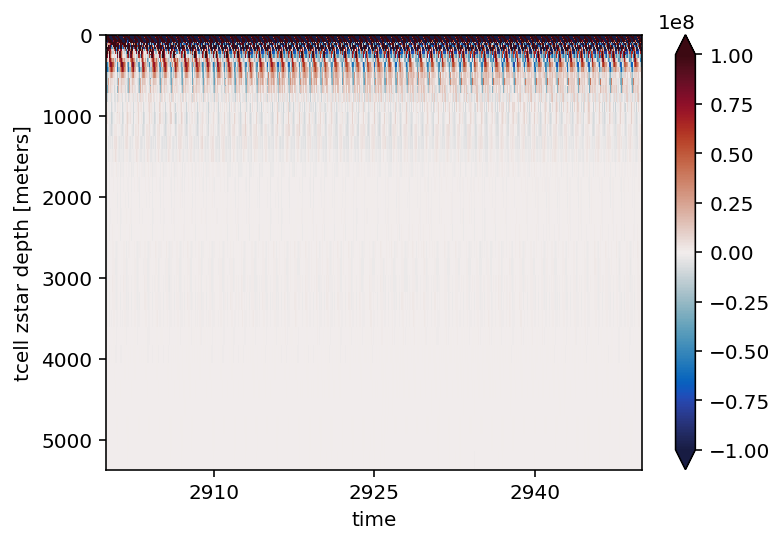

In [45]:
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'time', y = 'st_ocean', yincrease = False)

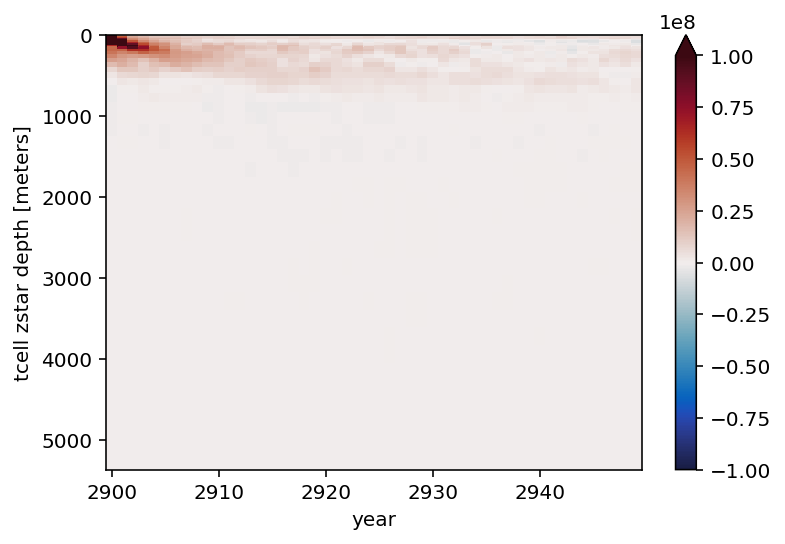

In [46]:
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

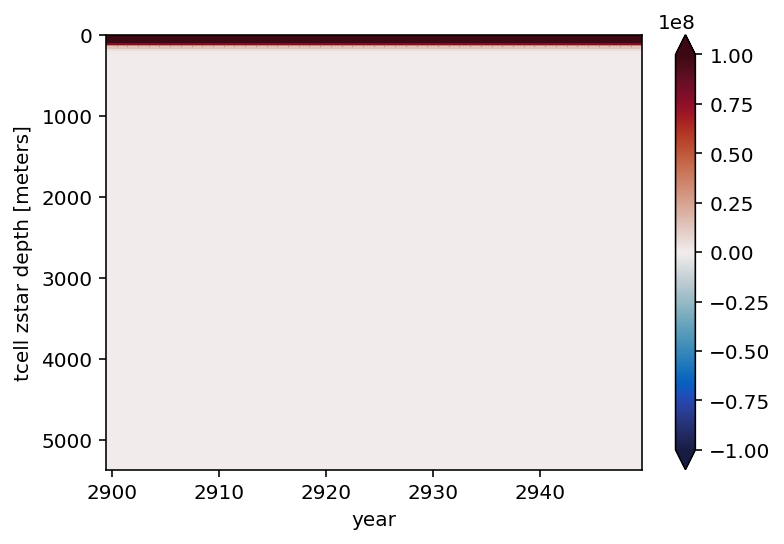

In [22]:
((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

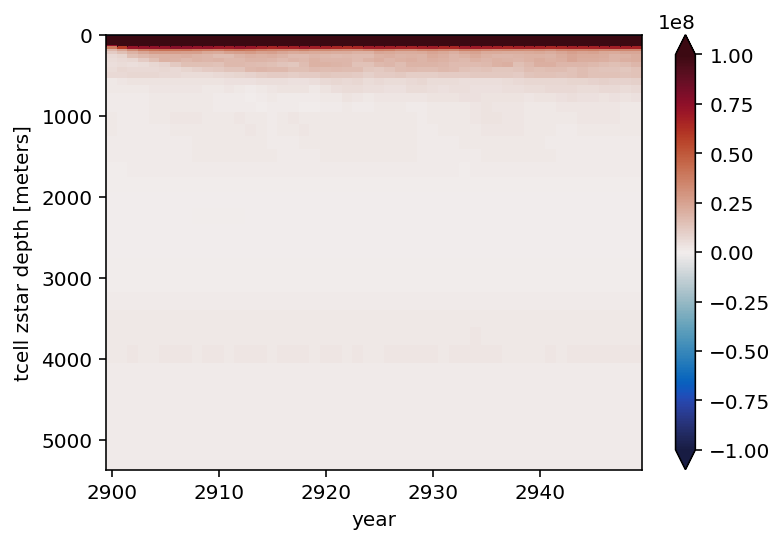

In [7]:
((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

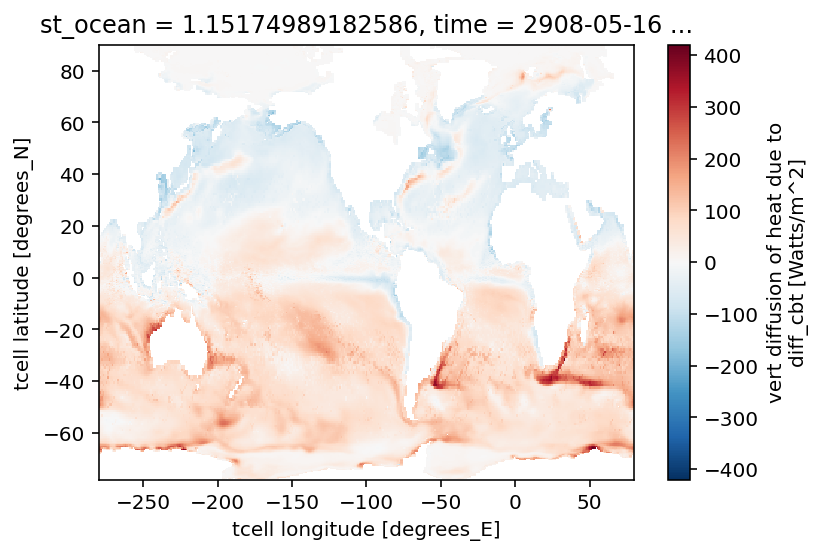

In [13]:
temp_vdiffuse_diff_cbt_warm.isel(st_ocean = 0).isel(time = 100).plot()

In [17]:
temp_vdiffuse_diff_cbt_warm

,Array,Chunk
Bytes,12.96 GB,2.70 MB
Shape,"(600, 50, 300, 360)","(1, 25, 150, 180)"
Count,9605 Tasks,4800 Chunks
Type,float32,numpy.ndarray


The heat conservation equation (horizontally averaged) can be written
$$ \frac{\partial}{\partial t} \overline{\rho _0 c_p \theta} = -\frac{\partial}{\partial z} \left(\overline{\rho _0 c_p \theta w} - \overline{\kappa _v \frac{\partial \theta}{\partial z} \rho _0 c_p} - \overline{\rho _0 c_p K_R \cdot \nabla \theta} \right)+ \overline{F}+\overline{S}  $$

The left hand side is the heat tendency, and from left to right on the right hand side the terms are the advective, diffusive, isopycnal mixing, and fluxes (incl. SW radiation that penetrates shallow waters, LW radiation, freshening from ice melt, precipitation, rivers etc.)

By integrating the tendency in the z direction we get 
$$ \int_{z}^{0} \frac{\partial}{\partial t} \overline{\rho _0 c_p \theta} dz = \int_z^0 dz \left( -\frac{\partial}{\partial z} (\overline{\rho _0 c_p \theta w} - \overline{\kappa _v \frac{\partial \theta}{\partial z} \rho _0 c_p} - \overline{\rho _0 c_p K_R \cdot \nabla \theta}) + \overline{F}+\overline{S} \right) $$
where bars stand for horizontal averages in the $x$ and $y$ directions. By the fundamental theorem of calculus this can be simplified to

$$ \int_{z}^{0} \frac{\partial}{\partial t} \overline{\rho _0 c_p \theta} dz = -\overline{\rho _0 c_p \theta w}(0)+\overline{\rho _0 c_p \theta w}(z) + \overline{\kappa _v \frac{\partial \theta}{\partial z} \rho _0 c_p}(0)-\overline{\kappa _v \frac{\partial \theta}{\partial z} \rho _0 c_p}(z) + \overline{\rho _0 c_p K_R \cdot \nabla \theta}(0)-\overline{\rho _0 c_p K_R \cdot \nabla \theta}(z) +\int_z^0 dz \left( \overline{F}+\overline{S} \right) $$

Heat fluxes due to advection, diffusion and isopycnal mixing should be zero at $z=0$ as these heat transports act only within the ocean. Thus we simplify to

$$ \int_{z}^{0} \frac{\partial}{\partial t} \overline{\rho _0 c_p \theta} dz = \overline{\rho _0 c_p \theta w}(z) -\overline{\kappa _v \frac{\partial \theta}{\partial z} \rho _0 c_p}(z) -\overline{\rho _0 c_p K_R \cdot \nabla \theta}(z) +\int_z^0 dz \left( \overline{F}+\overline{S} \right) $$

This can be discretised into 

cumsum over z of temp_tendency_ha/dzt = cumsum over z of adv_ha/dzt - cumsum over z of diff_ha - cumsum over z of mixing_ha + cumsum over z of surface/boundary flux

which will be a function of z and t

and it means these terms e.g. cumsum over z of diff_ha can be interpreted as the diff_ha flux at z=z

questions - 
1. should i be horizontally averaging or integrating

2. if we do this we have to initially mask things if we want to see the heat balance locally rather than globally? 

3. do the diffusive and other fluxes have the dzt also - seems to be so since they have units W/m^2

4. is z down i.e. z diffusion >0 implies heat going downwards

balancing original heat eqn terms

(0.0, 100.0)

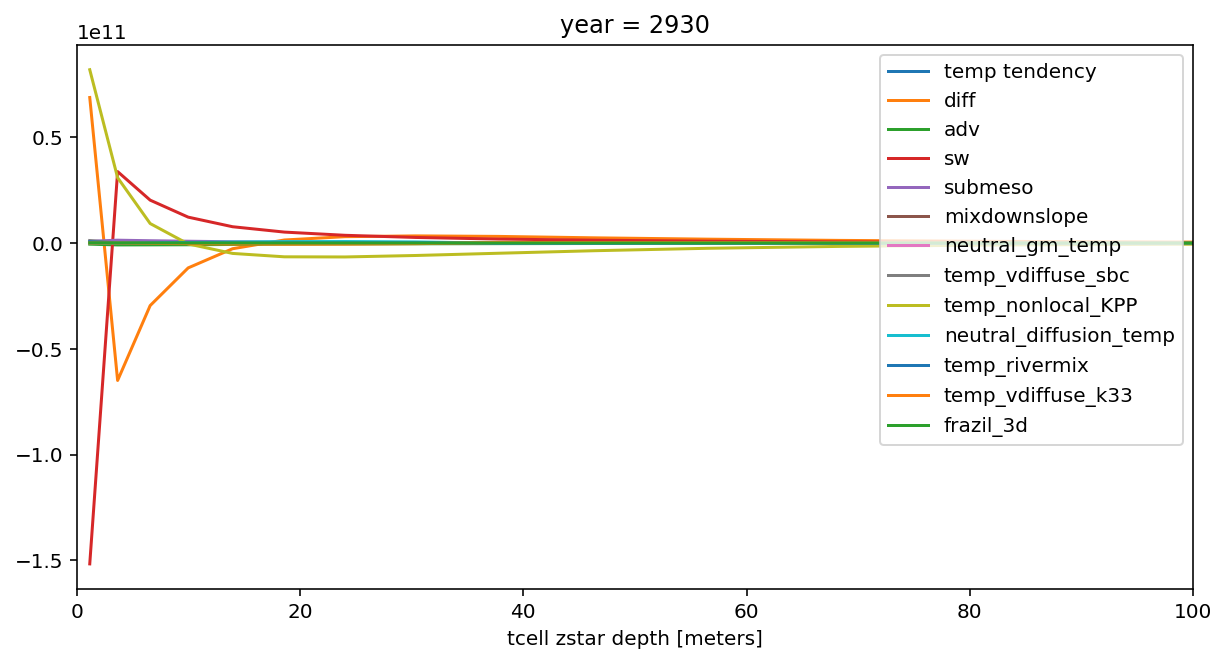

In [9]:
i = 30
plt.figure(figsize=(10,5))
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp tendency')
((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'diff')
((adv_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'adv')
((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'sw')
((temp_submeso_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'submeso')
((mixdownslope_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'mixdownslope')
((neutral_gm_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'neutral_gm_temp')
((temp_vdiffuse_sbc*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_vdiffuse_sbc')
((temp_nonlocal_KPP*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_nonlocal_KPP')
((neutral_diffusion_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'neutral_diffusion_temp')
((temp_rivermix*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_rivermix')
((temp_vdiffuse_k33*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_vdiffuse_k33')
((frazil_3d*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'frazil_3d')
((sfc_hflux_pme*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'sfc_hflux_pme')

sfc_hflux_pme



plt.legend()
plt.xlim(0,100)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

(0.0, 1000.0)

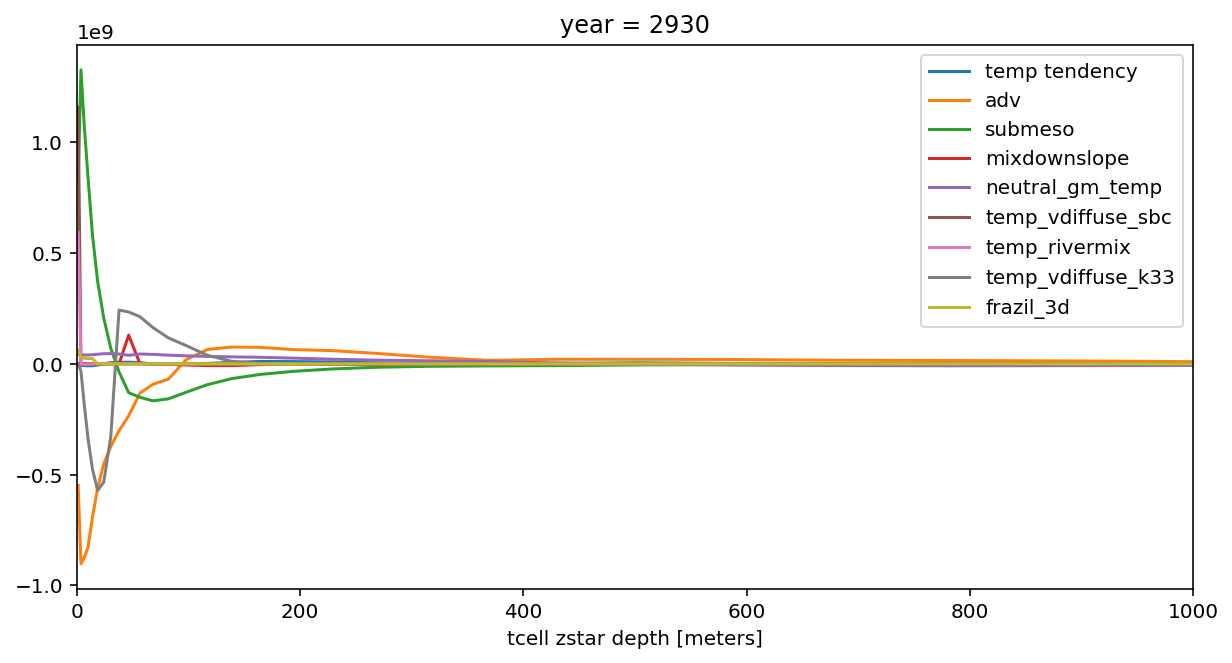

In [11]:
i = 30
plt.figure(figsize=(10,5))
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp tendency')
#((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'diff')
((adv_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'adv')
#((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'sw')
((temp_submeso_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'submeso')
((mixdownslope_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'mixdownslope')
((neutral_gm_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'neutral_gm_temp')
((temp_vdiffuse_sbc*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_vdiffuse_sbc')
#((temp_nonlocal_KPP*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_nonlocal_KPP')
((temp_rivermix*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_rivermix')
((temp_vdiffuse_k33*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_vdiffuse_k33')
((frazil_3d*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'frazil_3d')
((sfc_hflux_pme*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'sfc_hflux_pme')

plt.legend()
plt.xlim(0,1000)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

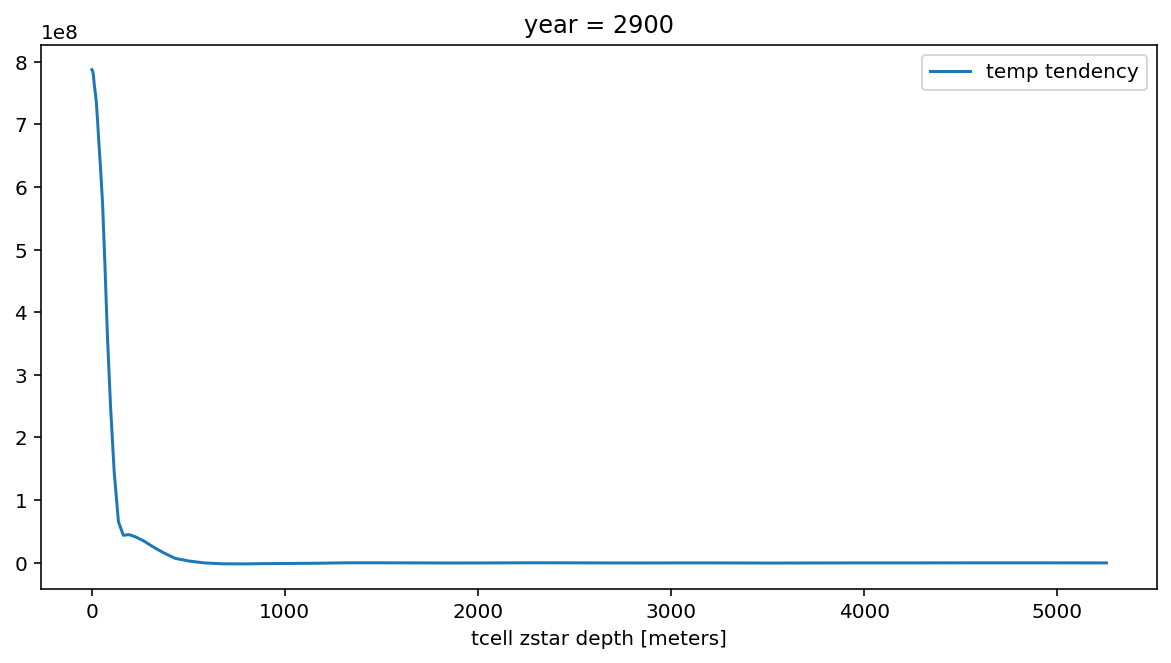

In [38]:
i = 0
plt.figure(figsize=(10,5))
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp tendency')
#((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'diff')
#((adv_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'adv')
#((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'sw')
#((temp_submeso_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'submeso')
#((mixdownslope_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'mixdownslope')
#((neutral_gm_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'neutral_gm_temp')
#((temp_vdiffuse_sbc*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp_vdiffuse_sbc')

plt.legend()
#plt.xlim(0,100)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

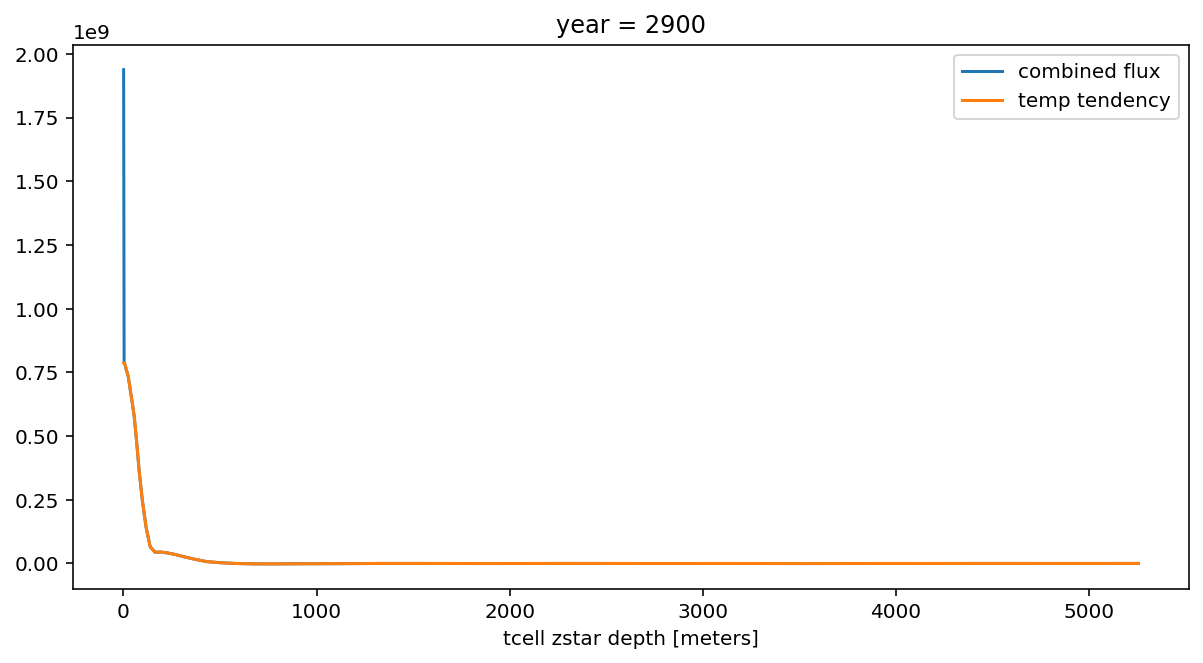

In [21]:
i = 0
plt.figure(figsize=(10,5))
combined_flux =(((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'diff')
((adv_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'adv')
((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'sw')
((temp_submeso_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'submeso')
((mixdownslope_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'mixdownslope')
((neutral_gm_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'neutral_gm_temp')
((temp_nonlocal_KPP*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'temp_nonlocal_KPP')
((neutral_diffusion_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'neutral_diffusion_temp')
((temp_rivermix*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'temp_rivermix')
((temp_vdiffuse_k33*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'temp_vdiffuse_k33')
((frazil_3d*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'frazil_3d')
#((sfc_hflux_pme*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'sfc_hflux_pme')
((temp_vdiffuse_sbc*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i))
combined_flux.plot(label = 'combined flux')
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp tendency')

plt.legend()
#plt.xlim(0,100)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

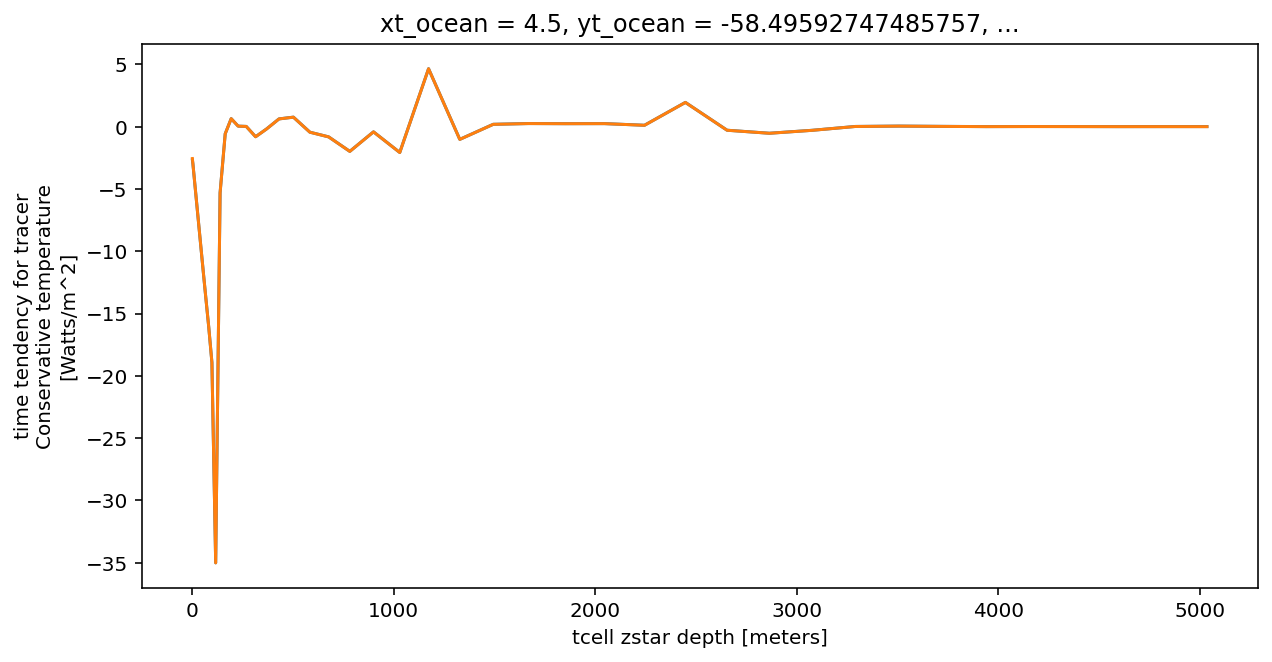

In [15]:
i = 54
plt.figure(figsize=(10,5))
combined_flux = (temp_vdiffuse_diff_cbt_warm+adv_warm+sw_heat_warm+temp_submeso_warm+mixdownslope_temp_warm+neutral_gm_temp+temp_nonlocal_KPP+neutral_diffusion_temp
                +temp_rivermix+temp_vdiffuse_k33+frazil_3d+sfc_hflux_pme+temp_vdiffuse_sbc).isel(time = i, yt_ocean = 45, xt_ocean = 284)
combined_flux.plot()
temp_tendency_warm.isel(time = i, yt_ocean = 45, xt_ocean = 284).plot()

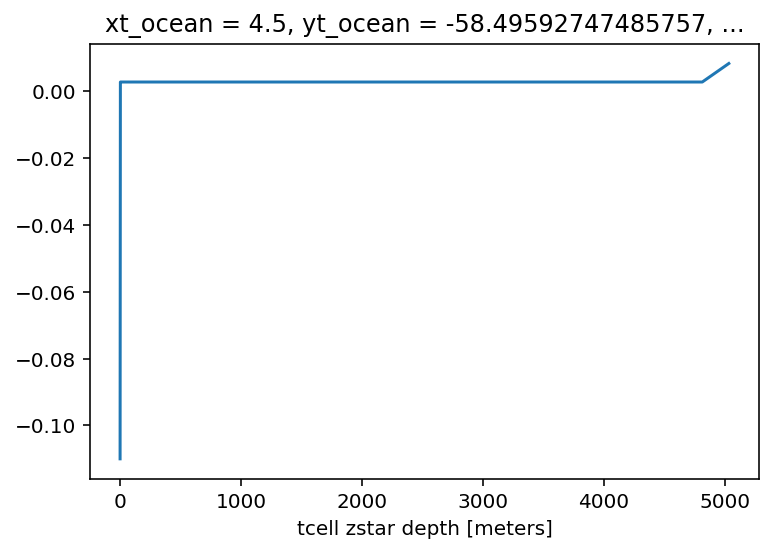

In [17]:
(combined_flux-temp_tendency_warm.isel(time = i, yt_ocean = 45, xt_ocean = 284)).plot()

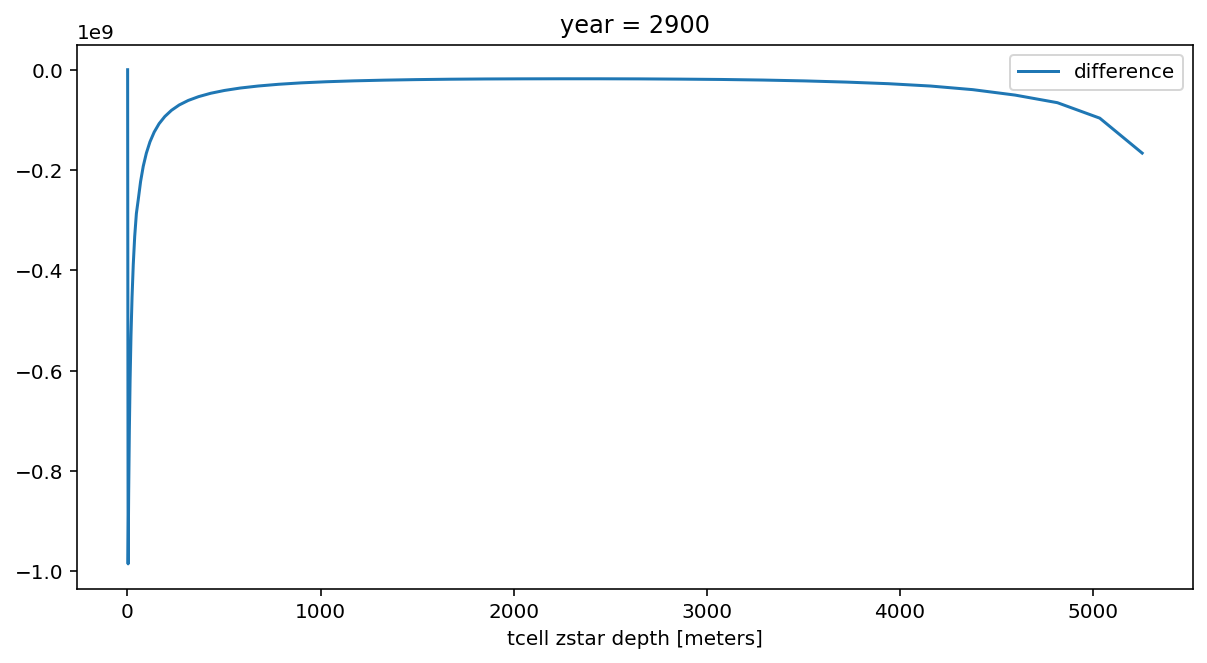

In [17]:
i = 0
plt.figure(figsize=(10,5))
(combined_flux-((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)).plot(label = 'difference')
plt.legend()


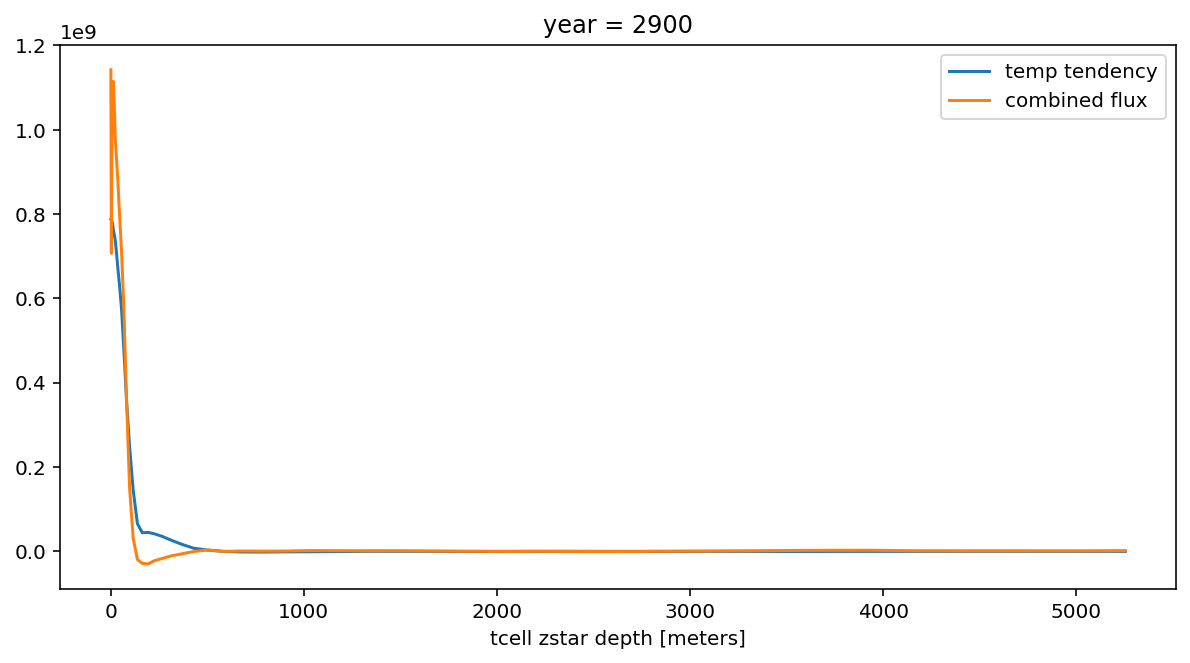

In [46]:
i = 0
plt.figure(figsize=(10,5))
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).plot(label = 'temp tendency')
(((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'diff')
#((adv_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'adv')
((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'sw')
#((temp_submeso_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'submeso')
#((mixdownslope_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'mixdownslope')
#((neutral_gm_temp*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#.plot(label = 'neutral_gm_temp')
((temp_nonlocal_KPP*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)+#).plot(label = 'combined flux')#.plot(label = 'temp_nonlocal_KPP')

((temp_vdiffuse_sbc*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i)).plot(label = 'combined flux')

plt.legend()
#plt.xlim(0,100)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

In [15]:
(sfc_hflux_pme_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean').groupby('time.year').mean('time').isel(year = i).values

array(-1.8440544e+14, dtype=float32)

cumsum('st_ocean')

(0.0, 1000.0)

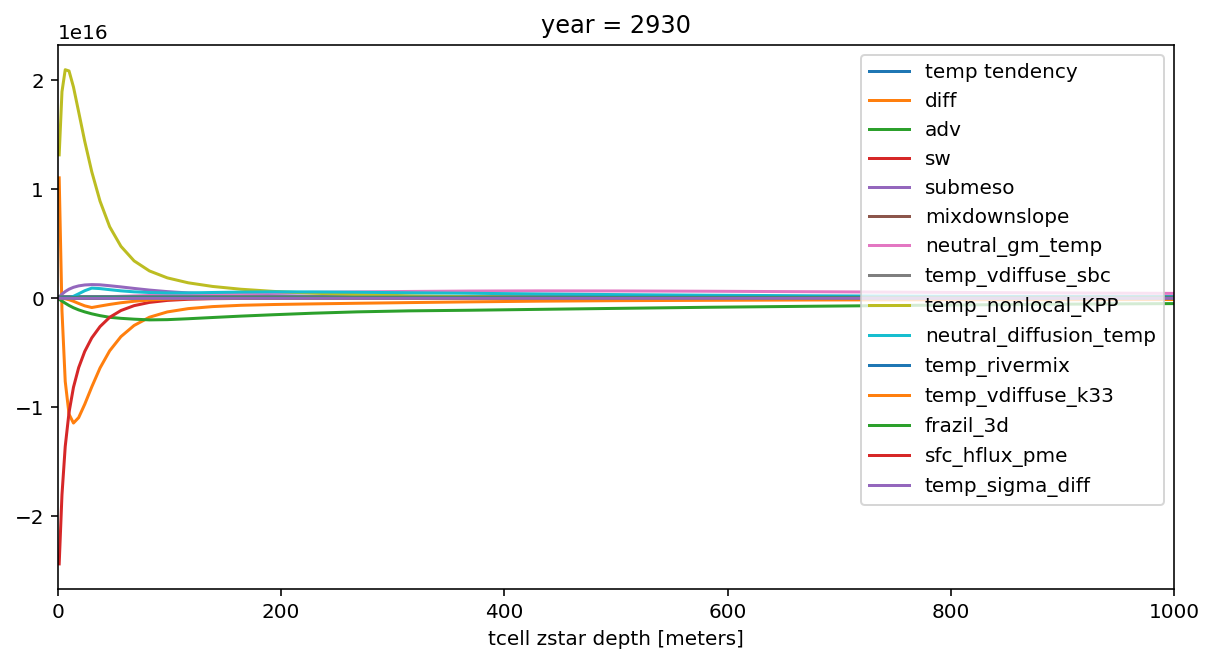

In [20]:
i = 30
plt.figure(figsize=(10,5))
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp tendency')
((temp_vdiffuse_diff_cbt_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'diff')
((adv_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'adv')
((sw_heat_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'sw')
((temp_submeso_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'submeso')
((mixdownslope_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'mixdownslope')
((neutral_gm_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'neutral_gm_temp')
((temp_vdiffuse_sbc_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp_vdiffuse_sbc')
((temp_nonlocal_KPP_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp_nonlocal_KPP')
((neutral_diffusion_temp_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'neutral_diffusion_temp')
((temp_rivermix_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp_rivermix')
((temp_vdiffuse_k33_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp_vdiffuse_k33')
((frazil_3d_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'frazil_3d')
plt.plot(0,((sfc_hflux_pme_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).values, label = 'sfc_hflux_pme')
((temp_sigma_diff_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp_sigma_diff')

#sfc_hflux_pme

# tendency: temp_tendency
# advection: adv + neutral_gm_temp + submeso
# vertical mixing: diff_cbt_t + nonlocal_KPP + mixdownslope + temp_sigma_diff
# along-isopycnal mixing: neutral_diffusion_tmep + temp_vdiffuse_k33
# surface forcing: sw_heat + vdiffuse_sbc + rivermix + frazil + sfc_hflux_pme


plt.legend()
plt.xlim(0,1000)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

In [21]:
sfc_hflux_pme_warm

,Array,Chunk
Bytes,259.20 MB,432.00 kB
Shape,"(600, 300, 360)","(1, 300, 360)"
Count,1205 Tasks,600 Chunks
Type,float32,numpy.ndarray


In [7]:
advection = adv_warm + neutral_gm_temp_warm + temp_submeso_warm
vertical_mixing = temp_vdiffuse_diff_cbt_warm + temp_nonlocal_KPP_warm + mixdownslope_temp_warm + temp_sigma_diff_warm
along_iso_mixing = neutral_diffusion_temp_warm + temp_vdiffuse_k33_warm
surface_forcing = frazil_3d_warm + temp_rivermix_warm + sw_heat_warm + temp_vdiffuse_sbc_warm

(0.0, 1000.0)

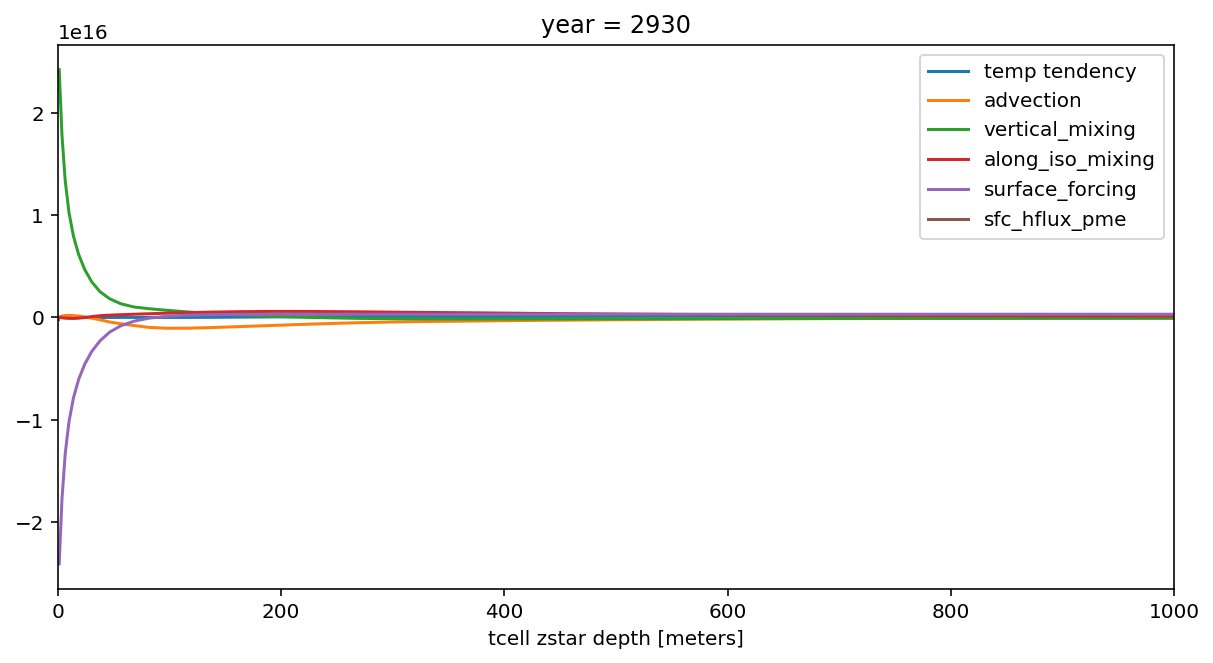

In [8]:
i = 30
ax = plt.figure(figsize=(10,5))
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'temp tendency')
((advection*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'advection')
((vertical_mixing*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'vertical_mixing')
((along_iso_mixing*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'along_iso_mixing')
((surface_forcing*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'surface_forcing')
plt.plot(np.array([0,0]),np.array([0,((sfc_hflux_pme_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).values]), label = 'sfc_hflux_pme')

#sfc_hflux_pme

# tendency: temp_tendency
# advection: adv + neutral_gm_temp + submeso
# vertical mixing: diff_cbt_t + nonlocal_KPP + mixdownslope + temp_sigma_diff
# along-isopycnal mixing: neutral_diffusion_tmep + temp_vdiffuse_k33
# surface forcing: sw_heat + vdiffuse_sbc + rivermix + frazil + sfc_hflux_pme

#plt.yscale('log')
plt.legend()
plt.xlim(0,1000)
#.plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

In [9]:
surface_forcing

,Array,Chunk
Bytes,12.96 GB,2.70 MB
Shape,"(600, 50, 300, 360)","(1, 25, 150, 180)"
Count,52820 Tasks,4800 Chunks
Type,float32,numpy.ndarray


In [15]:
new_surf = xr.concat([sfc_hflux_pme_warm.assign_coords(st_ocean = surface_forcing.isel(st_ocean=0).st_ocean.values),(0*surface_forcing).isel(st_ocean = np.arange(1,50))], dim = 'st_ocean')

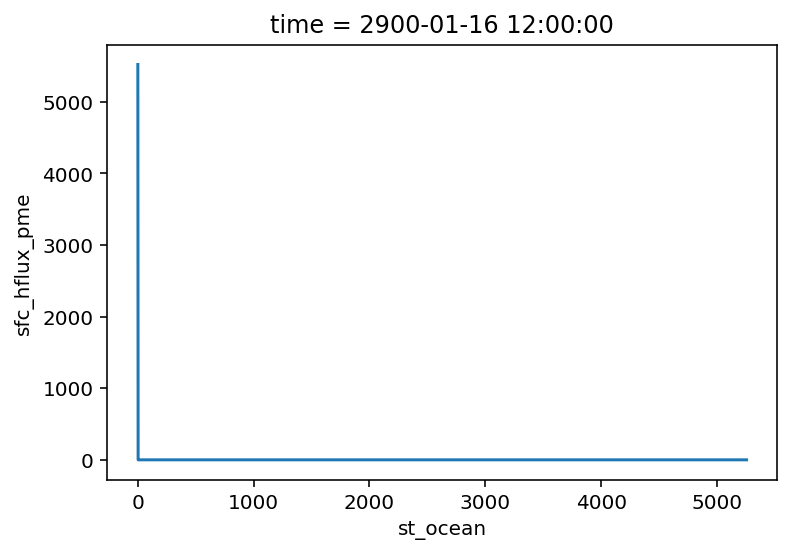

In [25]:
new_surf.sum('xt_ocean').sum('yt_ocean').isel(time = 0).plot()

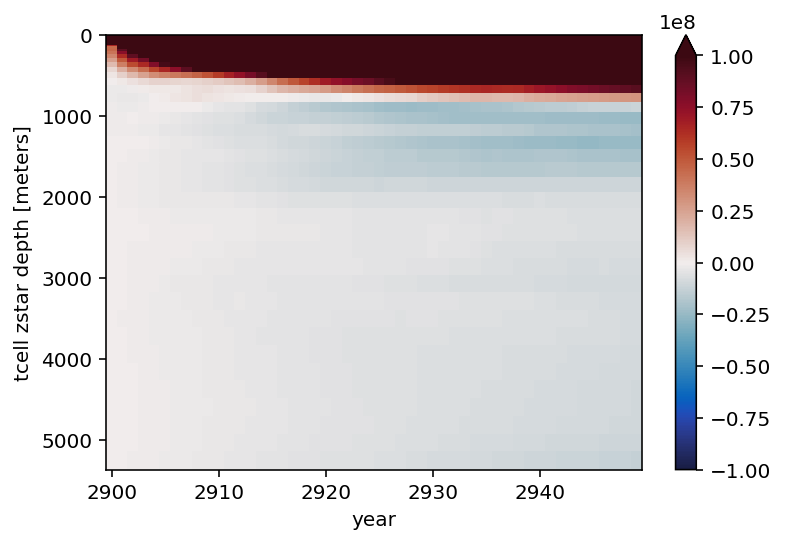

In [9]:
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').cumsum('year').plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

(0.0, 100.0)

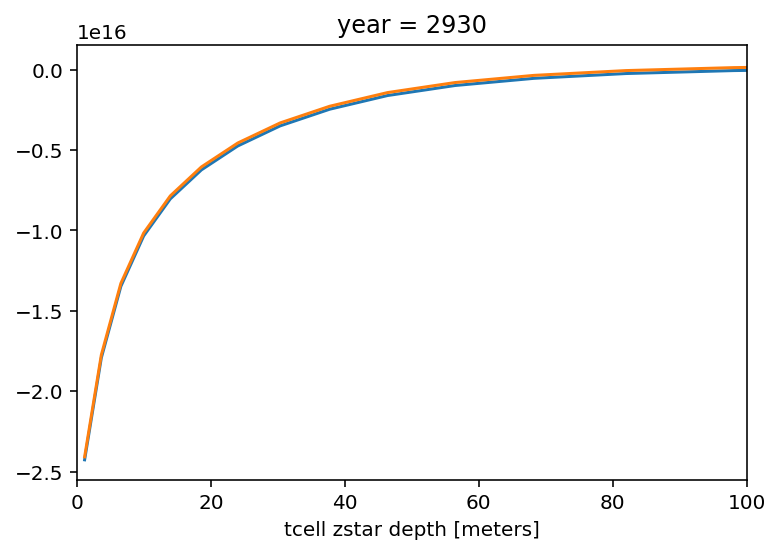

In [26]:
fig = plt.figure()
((new_surf+surface_forcing)*area_t_warm).sum('xt_ocean').sum('yt_ocean').groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'surface_forcing')
((surface_forcing*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'surface_forcing')

plt.xlim(0,100)
#plt.ylim(-2.5e16,-2.3e16)

not quite equal becaues of cumsum

(0.0, 100.0)

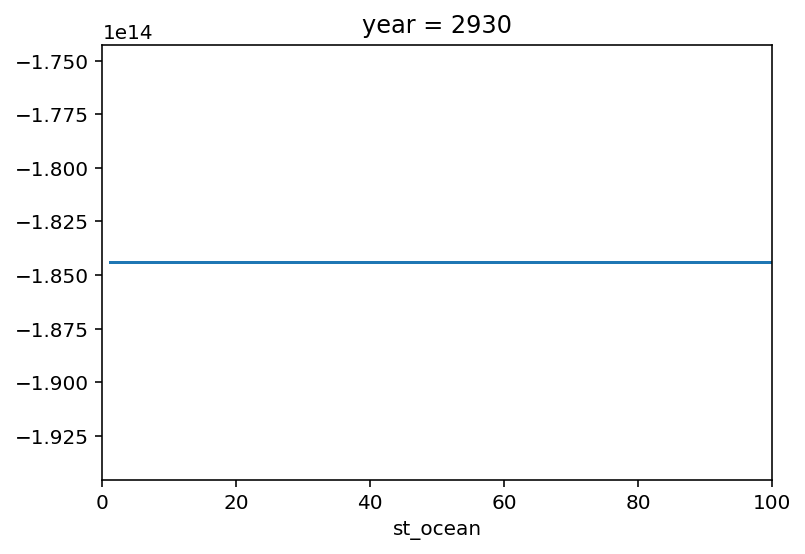

In [22]:
fig = plt.figure()
#((new_surf+surface_forcing)*area_t_warm).sum('xt_ocean').sum('yt_ocean').groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'surface_forcing')
#((surface_forcing*area_t_warm).sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'surface_forcing')
((new_surf)*area_t_warm).sum('xt_ocean').sum('yt_ocean').groupby('time.year').mean('time').isel(year = i).cumsum('st_ocean').plot(label = 'surface_forcing')

plt.xlim(0,100)
#plt.ylim(-2.5e16,-2.3e16)

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
cc.querying.get_variables(session, experiment='1deg_jra55_ryf_RCPwarmhumid', frequency='1 monthly')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
2,HTE,T cell width on East side,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
3,HTN,T cell width on North side,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
4,NCAT,category maximum thickness,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
5,TLAT,T grid center latitude,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
6,TLON,T grid center longitude,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
7,Tair_m,air temperature,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
8,Tsfc_m,snow/ice surface temperature,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
9,ULAT,U grid center latitude,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00


Southern Ocean Heat

In [5]:
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
sw_warm = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
lw_heat_warm = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
sens_heat_warm = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
evap_heat_warm = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')

In [6]:
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
sw_cool2x = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
lw_heat_cool2x = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
sens_heat_cool2x = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
evap_heat_cool2x = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')

In [7]:
expt = '1deg_jra55_ryf_RCPcont'
sw_cont = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
lw_heat_cont = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
sens_heat_cont = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')
evap_heat_cont = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc').groupby('time.year').mean('time')

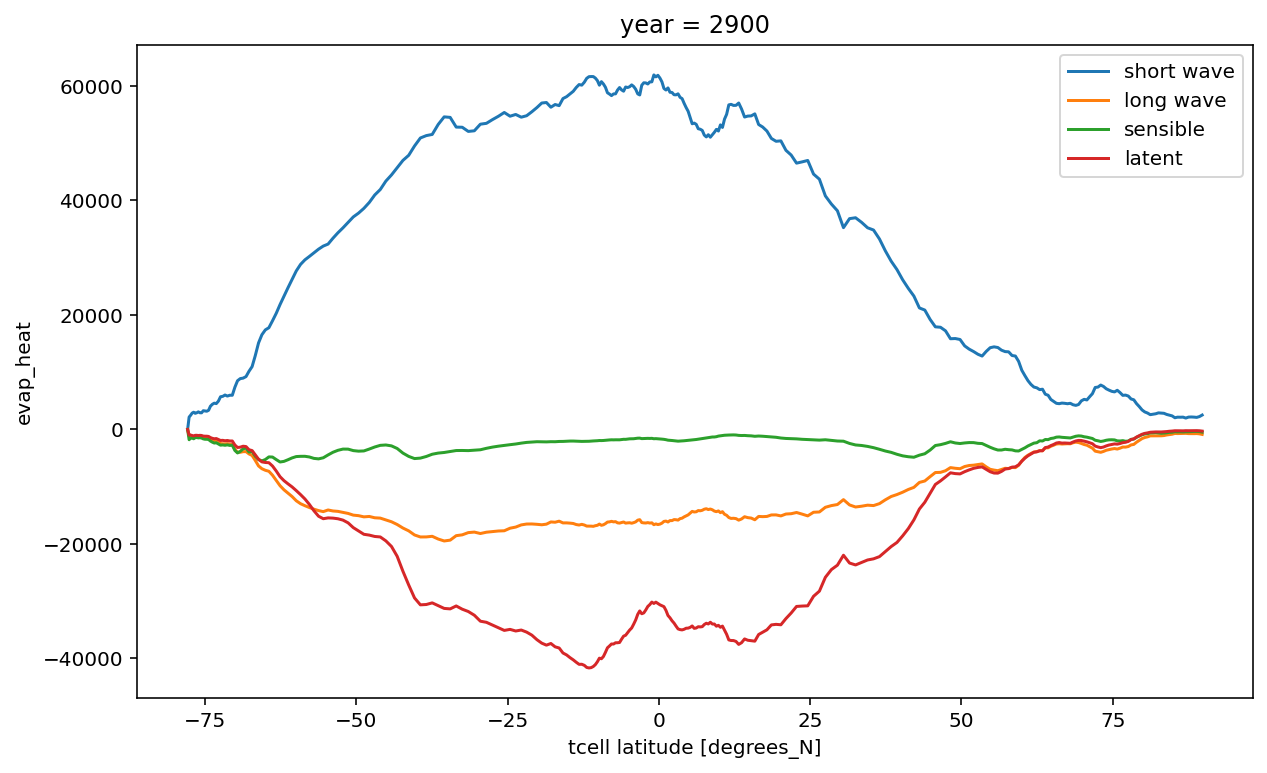

In [10]:
i = 0
fig = plt.figure(figsize = (10,6))
sw_cont.sum('xt_ocean').isel(year = i).plot(label = 'short wave')
lw_heat_cont.sum('xt_ocean').isel(year = i).plot(label = 'long wave')
sens_heat_cont.sum('xt_ocean').isel(year = i).plot(label = 'sensible')
evap_heat_cont.sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

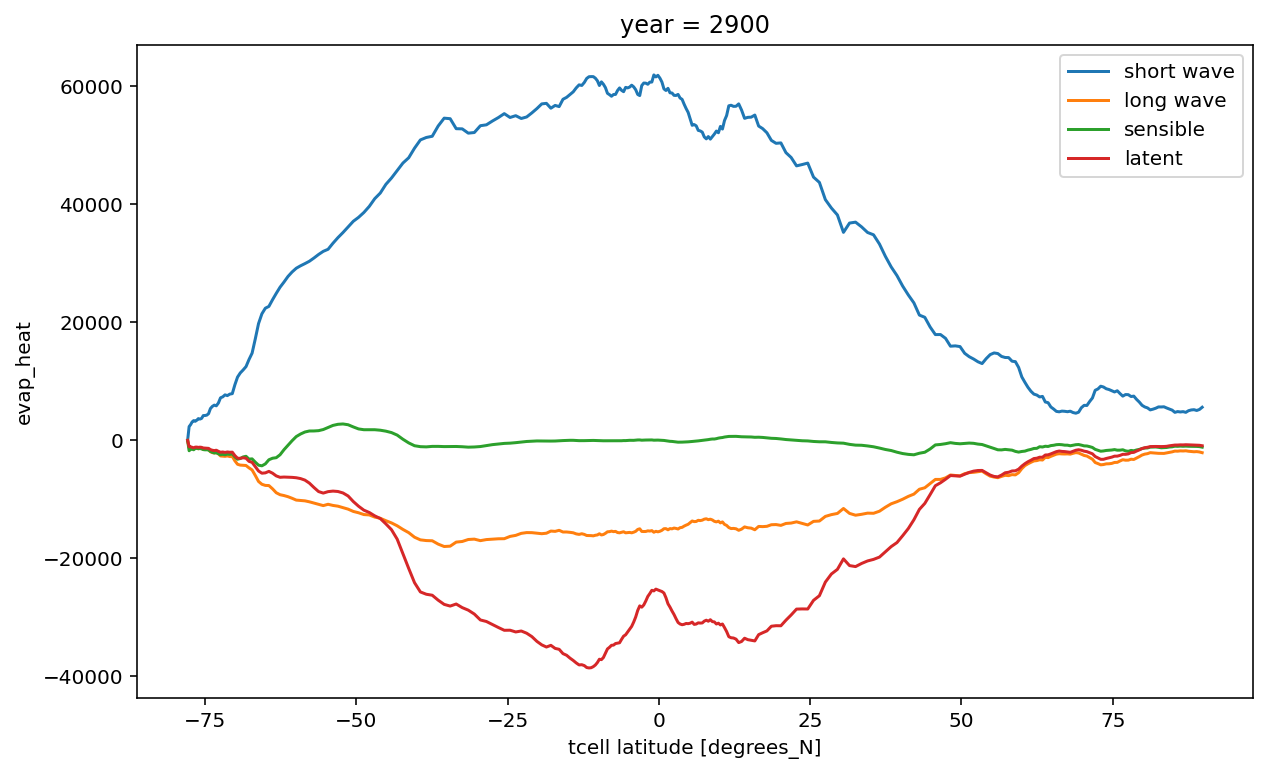

In [6]:
i = 0
fig = plt.figure(figsize = (10,6))
sw_warm.sum('xt_ocean').isel(year = i).plot(label = 'short wave')
lw_heat_warm.sum('xt_ocean').isel(year = i).plot(label = 'long wave')
sens_heat_warm.sum('xt_ocean').isel(year = i).plot(label = 'sensible')
evap_heat_warm.sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

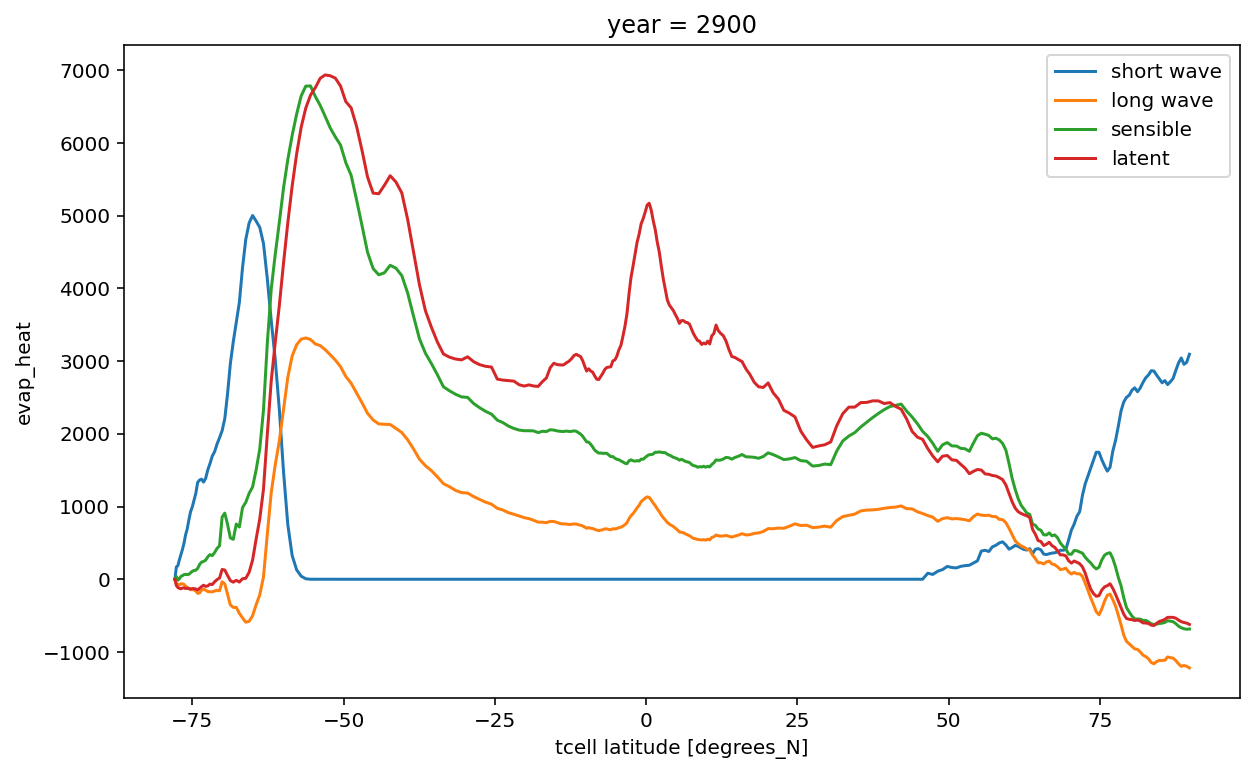

In [7]:
i = 0
fig = plt.figure(figsize = (10,6))
(sw_warm-sw_cont).sum('xt_ocean').isel(year = i).plot(label = 'short wave')
(lw_heat_warm-lw_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'long wave')
(sens_heat_warm-sens_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'sensible')
(evap_heat_warm-evap_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

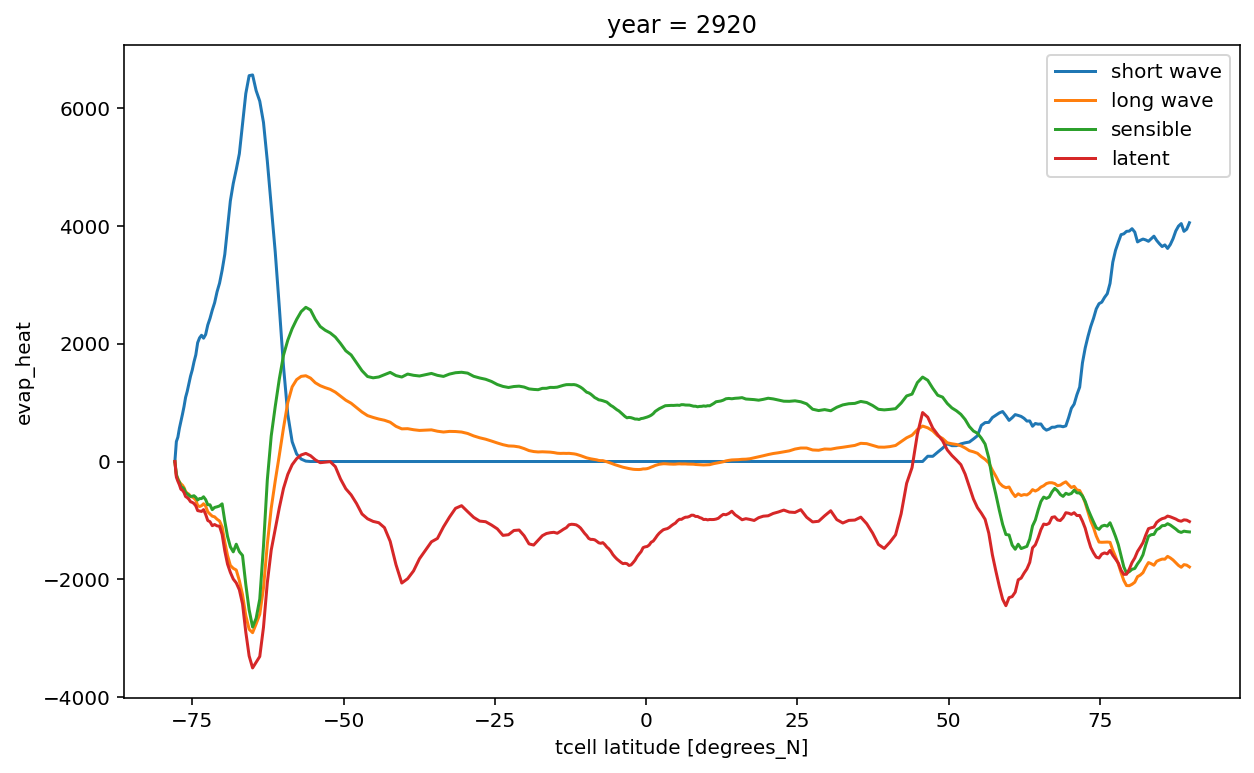

In [7]:
i = 20
fig = plt.figure(figsize = (10,6))
(sw_warm-sw_cont).sum('xt_ocean').isel(year = i).plot(label = 'short wave')
(lw_heat_warm-lw_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'long wave')
(sens_heat_warm-sens_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'sensible')
(evap_heat_warm-evap_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

ice melt??

green, orange, red slowly move down as before they were all negative, in year 0 all positive (except maybe north atlantic

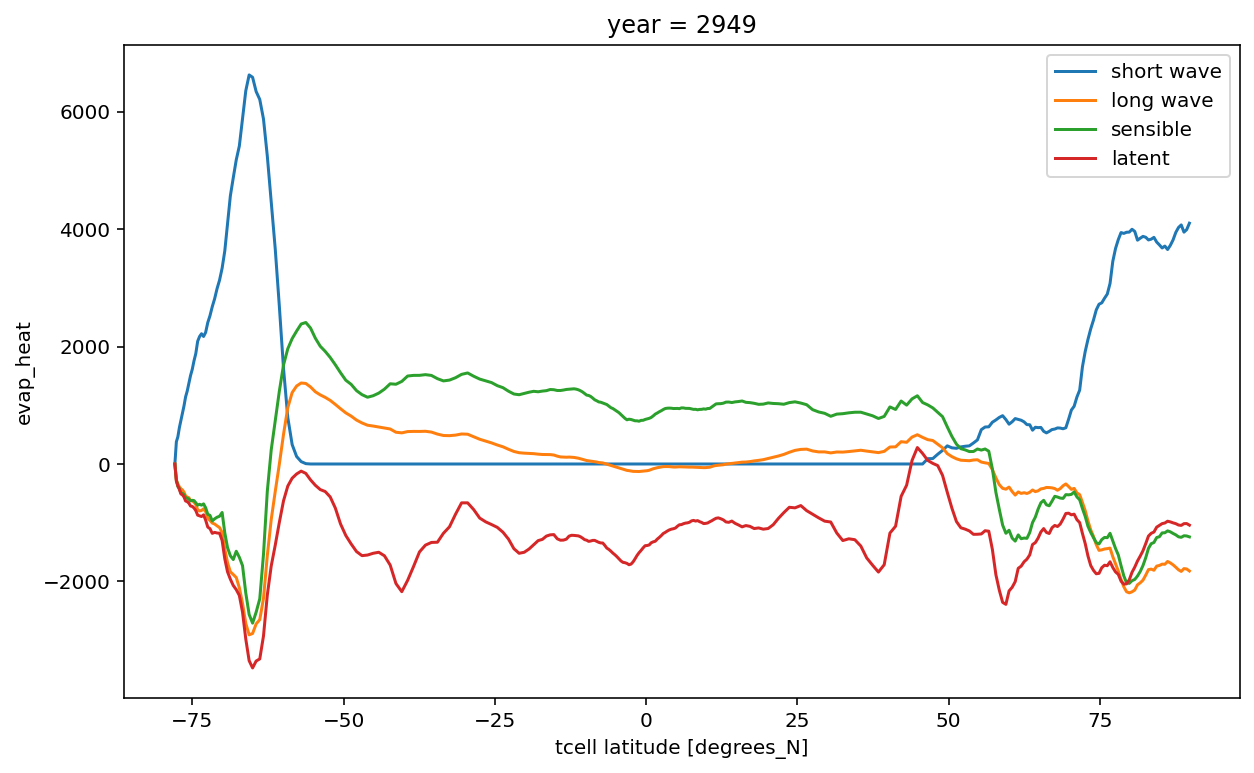

In [8]:
i = 49
fig = plt.figure(figsize = (10,6))
(sw_warm-sw_cont).sum('xt_ocean').isel(year = i).plot(label = 'short wave')
(lw_heat_warm-lw_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'long wave')
(sens_heat_warm-sens_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'sensible')
(evap_heat_warm-evap_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

coolhumid2x

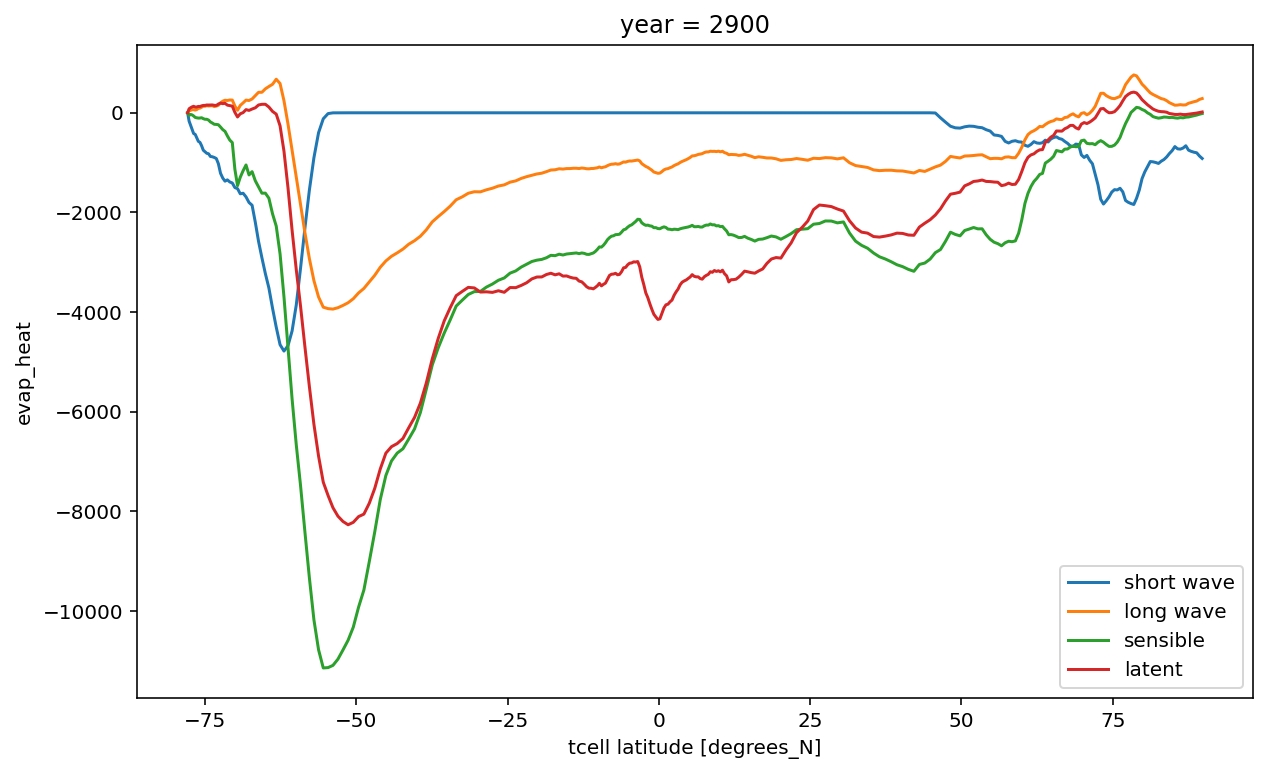

In [8]:
i = 0
fig = plt.figure(figsize = (10,6))
(sw_cool2x-sw_cont).sum('xt_ocean').isel(year = i).plot(label = 'short wave')
(lw_heat_cool2x-lw_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'long wave')
(sens_heat_cool2x-sens_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'sensible')
(evap_heat_cool2x-evap_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

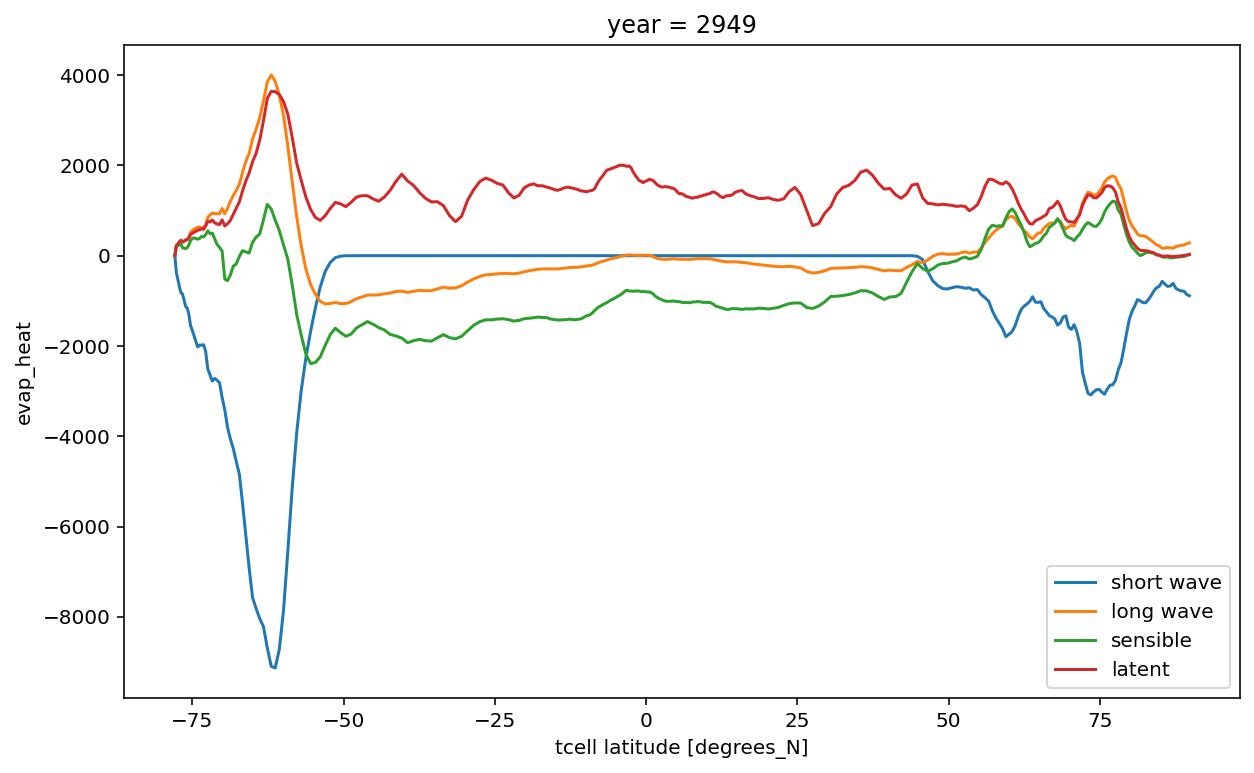

In [9]:
i = 49
fig = plt.figure(figsize = (10,6))
(sw_cool2x-sw_cont).sum('xt_ocean').isel(year = i).plot(label = 'short wave')
(lw_heat_cool2x-lw_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'long wave')
(sens_heat_cool2x-sens_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'sensible')
(evap_heat_cool2x-evap_heat_cont).sum('xt_ocean').isel(year = i).plot(label = 'latent')
plt.legend()

In [8]:
i = 20
fig = plt.figure(figsize = (10,6))
sw.groupby('time.year').mean('time').sum('xt_ocean').isel(year = i).plot(label = 'short wave')
lw_heat.groupby('time.year').mean('time').sum('xt_ocean').isel(year = i).plot(label = 'long wave')
sens_heat.groupby('time.year').mean('time').sum('xt_ocean').isel(year = i).plot(label = 'sensible')
evap_heat.groupby('time.year').mean('time').sum('xt_ocean').isel(year = i).plot(label = 'latent')


NameError: name 'sw' is not defined

<Figure size 720x432 with 0 Axes>